Amirhossein Khoshbakht
99105429

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials.
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [2]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    # Generate samples for X within the specified range
    X = np.linspace(range_start, range_end, num_samples)

    # Calculate y using the specified polynomial equation
    y = 0.1 * X**5 + X**4 - 2 * X**3 + 7 * X**2 - 9 * X + 3

    # Add normally distributed noise to y
    noise = np.random.normal(0, noise_std, num_samples)
    y_noisy = y + noise

    return X, y_noisy


In [4]:
# Generate the dataset with specified parameters
X, y = generate_dataset(-4, -1, 1000)

# Show the first few samples to verify
X[:10], y[:10]

(array([-4.        , -3.996997  , -3.99399399, -3.99099099, -3.98798799,
        -3.98498498, -3.98198198, -3.97897898, -3.97597598, -3.97297297]),
 array([432.83706187, 428.25097103, 426.77315662, 433.93276684,
        437.89970456, 429.03219046, 428.3408252 , 416.45440074,
        429.23962836, 427.82600449]))

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [5]:
from sklearn.model_selection import train_test_split

degree = 5

# Split the dataset into training and in-range testing sets (50% split)
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.5, random_state=42)

# Generate the out-of-range test set in the range of 5 to 7
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, 500)

# Display the first few samples of the training and testing sets to verify
X_train[:5], y_train[:5], X_test_in_range[:5], y_test_in_range[:5], X_test_out_of_range[:5], y_test_out_of_range[:5]

(array([-1.95795796, -3.46846847, -2.81381381, -1.26426426, -1.61861862]),
 array([ 74.6247155 , 298.88463098, 168.93257847,  39.69575802,
         49.09267827]),
 array([-2.43543544, -1.78678679, -1.77777778, -2.01801802, -2.76576577]),
 array([127.97764417,  63.60142432,  52.17106496,  76.00045563,
        168.46190911]),
 array([5.        , 5.00400802, 5.00801603, 5.01202405, 5.01603206]),
 array([815.1104435 , 818.59640464, 827.51672557, 830.62157718,
        825.4563108 ]))

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def train_polynomial_regression(X, y, degree):
    # Create a pipeline that first creates polynomial features and then fits a linear regression model
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])

    # Reshape X to fit the model (necessary if X is a 1D array)
    X_reshaped = X.reshape(-1, 1)

    # Train the model using the provided X and y data
    model.fit(X_reshaped, y)

    return model

# Example usage:
# Train a model for polynomial degree 5
model_degree_5 = train_polynomial_regression(X_train, y_train, 5)


In [7]:
models = {}

# Loop through degrees 2 to 7 inclusive
for d in range(2, degree + 3):
    # Train the model for each degree and store it in the dictionary
    models[d] = train_polynomial_regression(X_train, y_train, d)

# This will create and store models for each degree specified


## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [8]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = {}
    # Ensure X_test is reshaped for prediction
    X_test_reshaped = X_test.reshape(-1, 1)

    # Iterate through the models dictionary
    for degree, model in models.items():
        # Use the model to predict the y values
        y_pred = model.predict(X_test_reshaped)

        # Calculate the MSE and store it in the dictionary with the corresponding degree
        losses[degree] = mean_squared_error(y_test, y_pred)

    return losses

# Example usage:
# Evaluate all models on the in-range test set
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
# Evaluate all models on the out-of-range test set
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

# Optionally, you can print the losses to see the MSE for each model
print("In-range Test Set Losses:", losses_in_range)
print("Out-of-range Test Set Losses:", losses_out_of_range)


In-range Test Set Losses: {2: 31.475420006948685, 3: 23.5720360690031, 4: 23.660863441541643, 5: 23.716558007760383, 6: 23.70934651760277, 7: 23.689783494752422}
Out-of-range Test Set Losses: {2: 246363.0726006168, 3: 11123943.43738203, 4: 64267993.630313784, 5: 1223292093.5934653, 6: 592940770879.849, 7: 7273870958413.595}


In [9]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change.


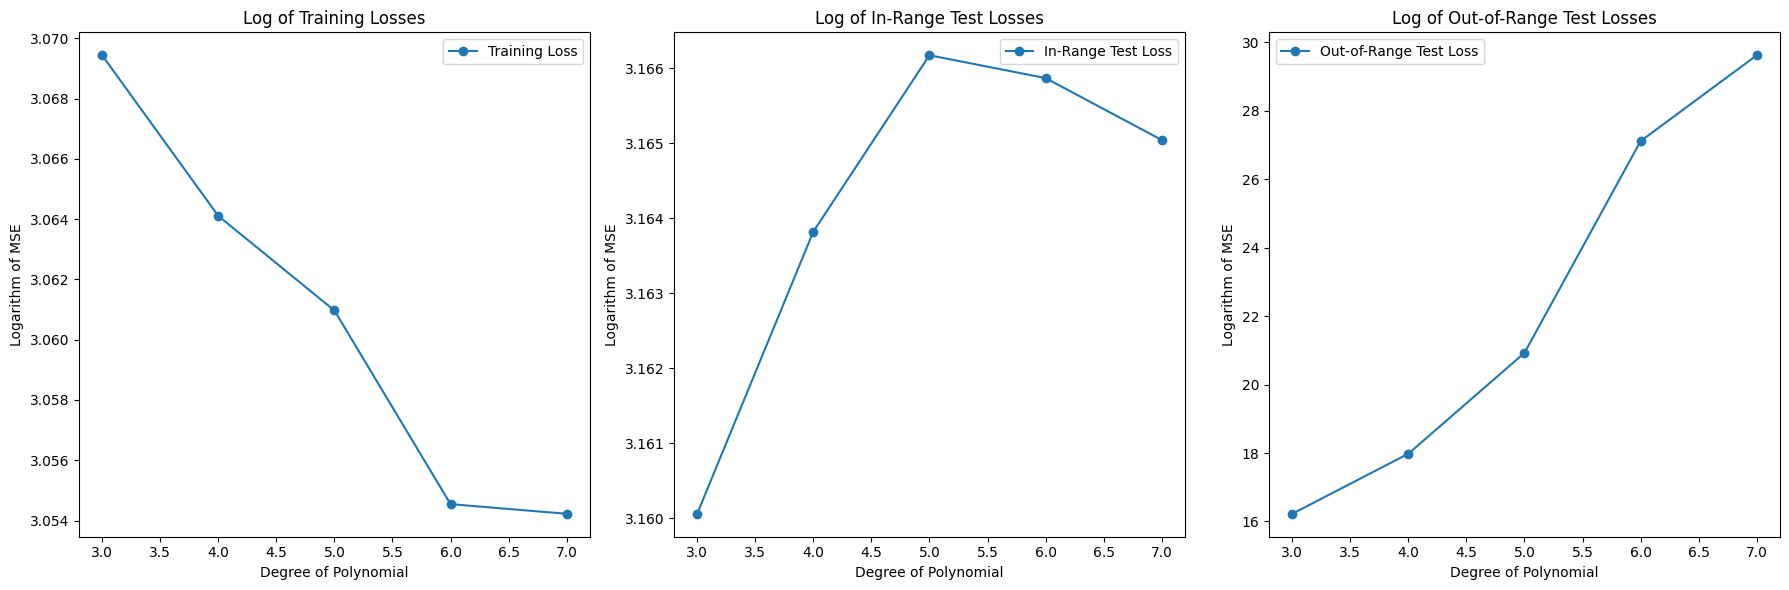

In [11]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

# Function to evaluate the models and calculate MSE for each degree
def evaluate_models(models, X, y):
    X = X.reshape(-1, 1)
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        losses[degree] = mse
    return losses

# Train models and evaluate
degrees = range(3, 8)
models = {degree: train_polynomial_regression(X_train, y_train, degree) for degree in degrees}
training_losses = evaluate_models(models, X_train, y_train)
in_range_losses = evaluate_models(models, X_test_in_range, y_test_in_range)
out_of_range_losses = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot logarithm of losses of training set
ax1.plot(list(degrees), np.log(list(training_losses.values())), label='Training Loss', marker='o')
ax1.set_title('Log of Training Losses')
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('Logarithm of MSE')
ax1.legend()

# Plot logarithm of losses of in-range test set
ax2.plot(list(degrees), np.log(list(in_range_losses.values())), label='In-Range Test Loss', marker='o')
ax2.set_title('Log of In-Range Test Losses')
ax2.set_xlabel('Degree of Polynomial')
ax2.set_ylabel('Logarithm of MSE')
ax2.legend()

# Plot logarithm of losses of out-of-range test set
ax3.plot(list(degrees), np.log(list(out_of_range_losses.values())), label='Out-of-Range Test Loss', marker='o')
ax3.set_title('Log of Out-of-Range Test Losses')
ax3.set_xlabel('Degree of Polynomial')
ax3.set_ylabel('Logarithm of MSE')
ax3.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Conclusion (10 Points)

Now print out the losses on each set here.

In [12]:
# Print the losses for each model
print("Model Performance Summary:\n")
print("Degree | Training Loss | In-Range Test Loss | Out-of-Range Test Loss")
print("-" * 68)
for degree in range(3, 8):
    training_loss = training_losses[degree]
    in_range_test_loss = in_range_losses[degree]
    out_of_range_test_loss = out_of_range_losses[degree]

    print(f"{degree:^6} | {training_loss:^14.4f} | {in_range_test_loss:^18.4f} | {out_of_range_test_loss:^21.4f}")



Model Performance Summary:

Degree | Training Loss | In-Range Test Loss | Out-of-Range Test Loss
--------------------------------------------------------------------
  3    |    21.5298     |      23.5720       |     11123943.4374    
  4    |    21.4154     |      23.6609       |     64267993.6303    
  5    |    21.3483     |      23.7166       |    1223292093.5935   
  6    |    21.2115     |      23.7093       |   592940770879.8490  
  7    |    21.2047     |      23.6898       |  7273870958413.5947  


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**

با بررسی میزان خطای داده‌های آموزشی در مقایسه با داده‌های تست داخل دامنه، و همچنین مقایسه داده‌های تست داخل دامنه با داده‌های تست خارج از دامنه، به خصوص در درجه‌های بالاتر، می‌توانیم درکی از تعادل بایاس-واریانس و پدیده‌های اورفیتینگ و تعمیم پذیری به دست آوریم. در اینجا نتیجه‌گیری دقیق‌تری ارائه می‌دهیم:

### تعادل بایاس-واریانس

۱. **پلینوم‌های درجه بالا و خطای آموزشی**: مدل‌های پلینومی با درجه‌های بالاتر معمولا داده‌های آموزشی را به خوبی تطبیق می‌دهند، که منجر به خطای آموزشی پایین می‌شود. این به دلیل انعطاف‌پذیری بالای مدل است که به آن اجازه می‌دهد الگوهای پیچیده و نویز موجود در داده‌های آموزشی را درک کند.

۲. **مقایسه با خطای تست داخل دامنه**: با افزایش درجه پلینوم، خطای تست داخل دامنه ابتدا ممکن است کاهش یابد، که نشان‌دهنده بهبود در تطبیق با رابطه زمینه‌ای واقعی است. با این حال، پس از یک درجه خاص، این خطا ممکن است شروع به افزایش کند، که نشان‌دهنده اورفیتینگ است. اورفیتینگ زمانی رخ می‌دهد که مدل نه تنها الگوی زمینه‌ای را یاد می‌گیرد بلکه نویز و داده‌های آموزشی را نیز یاد می‌گیرد که به داده‌های جدید تعمیم داده نمی‌شود، حتی اگر داخل دامنه آموزشی باشد.

۳. **خطای تست خارج از دامنه**: هنگامی که مدل‌های پلینومی درجه بالا در داده‌های تست خارج از دامنه ارزیابی می‌شوند، خطا معمولا به طور قابل توجهی افزایش می‌یابد. این مسئله مشکل اساسی با پلینوم‌های درجه بالا را نشان می‌دهد: تمایل آن‌ها به نشان دادن مقادیر شدید یا نوسانات خارج از دامنه داده‌های آموزشی، که به عنوان خطای استراپولیشن شناخته می‌شود. این مسئله نیز تعمیم پذیری ضعیف را برجسته می‌کند.

### اورفیتینگ و تعمیم‌پذیری



- **اورفیتینگ**: این وضعیت زمانی مشخص است که خطای آموزشی به طور قابل توجهی کمتر از خطای تست داخل دامنه باشد، به ویژه برای پلینوم‌های درجه بالا. مدل بیش از حد به داده‌های آموزشی خوب می‌چسبد، نویز و ناهنجاری‌هایی که به داده‌های دیگر قابل اعمال نیستند را یاد می‌گیرد و منجر به عملکرد ضعیف در حتی تست داخل دامنه می‌شود.

- **تعمیم به داده‌های دیده نشده**: افزایش خطا در تست خارج از دامنه با افزایش درجه پلینوم، نشان‌دهنده عدم تعمیم‌پذیری است. یک مدل که در داده‌های آموزشی و تست داخل دامنه خوب عمل می‌کند اما در داده‌های خارج از دامنه ضعیف است، کاربرد محدودی در کاربردهای واقعی دارد، جایی که داده‌ها ممکن است به روش‌هایی که در داده‌های آموزشی نمایش داده نشده‌اند، متغیر باشند.

### نتیجه‌گیری

نکته کلیدی این است که در حالی که افزایش پیچیدگی مدل (مانند استفاده از پلینوم‌های درجه بالاتر) می‌تواند بایاس را کاهش دهد، واریانس را نیز افزایش می‌دهد و می‌تواند منجر به اورفیتینگ شود، مگر اینکه به درستی کنترل شود. این امر منجر به مدل‌هایی می‌شود که به خوبی به داده‌های جدید تعمیم داده نمی‌شوند، به ویژه داده‌هایی که خارج از دامنه آموزشی هستند. تمرین مؤثر یادگیری ماشین شامل انتخاب پیچیدگی مدلی است که تعادل بین خوب تطبیق دادن داده‌های آموزشی (بایاس پایین) و عملکرد خوب در داده‌های جدید، دیده نشده (واریانس پایین) را برقرار کند. تکنیک‌هایی مانند اعتبارسنجی متقابل، تنظیم مجدد، و انتخاب پیچیدگی مدل مناسب بر اساس داده‌های اعتبارسنجی می‌تواند در دستیابی به این تعادل کمک کند.

Expected to explain overfitiing on the training set and also the face that model has less generalization to unseen data.